In [211]:
# Reference: https://jupyterbook.org/interactive/hiding.html
# Use {hide, remove}-{input, output, cell} tags to hiding content

import sys
import os
sys.path.append(os.path.abspath('../../..'))
from textbook_utils import *

In [212]:
trees = pd.read_csv('data/black_spruce.csv')

In [213]:
trees['status_0_1'] = 0 + (trees['status'] == 'fallen')

In [215]:
splits = [4, 5, 6, 7, 8, 9, 10, 12, 14, 17, 20, 30]
pr_split = np.zeros(len(splits) - 1)
ct_split = np.zeros(len(splits) - 1)

for i in range(0, len(splits) - 1):
    sub_trees = trees["status_0_1"][
        (
            (trees["diameter"] > splits[i])
            & (trees["diameter"] <= splits[i + 1])
        )
    ]
    pr_split[i] = np.mean(sub_trees)
    ct_split[i] = len(sub_trees)

tree_bins = pd.DataFrame(
    {"proportion": pr_split, "count": ct_split, "diameter": splits[1:]}
)

# A Loss Function for the Logistic Model

The logistic model gives us probabilities (or empirical proportions), so we write our loss function as $\ell(p, y) $, where $p$ is between 0 and 1. The response takes on one of two values because our outcome feature is a binary classification. Thus, any loss function reduces to: 

$$
\begin{aligned} 
{\ell}(p, y) = 
 \begin{cases}
    \ell(p, 0) & \text{if $y$ is 0} \\    
    \ell(p, 1) & \text{if $y$ is 1}
    \end{cases}
\end{aligned} 
$$

Once again, using 0 and 1 to represent the categories has an advantage because we can conveniently write the loss as:

$$ 
\ell(p, y) =  ~ y \ell(p, y) + (1-y) \ell(p, 1-y)            
$$

We encourage you to confirm this equivalence by considering the two cases $y=1$ and $y=0$.

The logistic model pairs well with *log loss*:

$$
\begin{aligned} 
{\ell}(p, y) = & 
 \begin{cases}
    -\log(p) & \text{if $y$ is 1} \\    
    -\log(1-p) & \text{if $y$ is 0}
    \end{cases}
    \\
    = & -y \log(p) -(1-y) \log(1-p)   
\end{aligned} 
$$ 

Note that the log loss is not defined at 0 and 1 because $-\log (p)$ tends to $\infty$ as $p$ approaches 0, and similarly for $-\log (1-p)$ as $ p $ tends to 1. We need to be careful to avoid the end points in our minimization. We can see this in the following plot of the two forms of the loss function: 

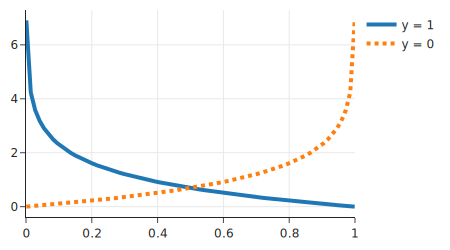

In [216]:
p = np.linspace(0.001, 0.999, 75)

fig = go.Figure()

fig.add_trace(
    go.Scatter(x=p, y=-1 * np.log(p), name="y = 1", line=dict(width=4))
)
fig.add_trace(
    go.Scatter(
        x=p, y=-1 * np.log(1 - p), name="y = 0", line=dict(width=4, dash="dot")
    )
)

fig.update_layout(width=450, height=250, xaxis_range=[0, 1])
fig

When $y $ is 1 (solid line), the loss is small for $p$ near 1,
and when $y$ is 0 (dotted line), the loss is small near 0.

If our goal is to fit a constant to the data using log loss, then the average loss is:

$$
\begin{aligned}
L(p, \textbf{y}) = &  \frac{1}{n} \sum_i  [- y_i  \log(p)  - (1 - y_i) \log (1 -p)] \\
 = & -\frac{n_1}{n} \log(p)  - \frac{n_0}{n} \log (1 -p))
\end{aligned}
$$
Here $n_0$ and $n_1$ are the number of $y_i$ that are 0 and 1, respectively. 
We can differentiate with respect to $ p$ to find the minimizer:


$$
\frac {\partial L(p, \textbf{y})} {\partial p} =  -\frac{n_1}{np}  + \frac{n_0}{n(1-p)}
$$

Then we set the derivative to 0 and solve for the minimizing value $\hat{p}$:

$$
\begin{aligned}
0 &= -\frac{n_1}{n{\hat{p}}}  + \frac{n_0}{n(1-{\hat{p}})} \\
0 &= - \hat{p}(1-\hat{p}) \frac{n_1}{\hat{p}}  + \hat{p}(1-\hat{p}) \frac{n_0}{(1-{\hat{p}})}\\ 
{n_1} (1-\hat{p})  & = {n_0} \hat{p}\\
\hat{p}  & = \frac{n_1}{n}
\end{aligned}
$$

(The final equation results from noting that $n_0 + n_1 = n$.)

To fit a more complex model based on the logistic function, we can substitute $ \sigma(\theta_0 + \theta_1x) $ for $ p $. And the loss for the logistic model becomes: 

$$ 
\begin{aligned}
{\ell}(\sigma(\theta_0 + \theta_1x), y) & =  ~ y \ell(\sigma(\theta_0 + \theta_1x), y) + 
(1-y)\ell(\sigma(\theta_0 + \theta_1x), 1-y)   \\
 & = y \log(\sigma(\theta_0 + \theta_1x)) + 
(1-y)\log(\sigma(\theta_0 + \theta_1x))
\end{aligned}
$$

Averaging the loss over the data, we arrive at:

$$
\begin{aligned}
L(\theta_0, \theta_1,\textbf{x}, \textbf{y}) =  \frac{1}{n} \sum_i  & - y_i 
 \log(\sigma(\theta_0 + \theta_1x_i)) \\
 & - (1 - y_i) \log (1 - \sigma(\theta_0 + \theta_1x_i))
\end{aligned}
$$

Unlike with squared loss, there is no closed form solution to this loss function. Instead, we use iterative methods like gradient descent (see {numref}`Chapter %s <ch:optimization>`) to minimize the average loss. This is also one of the reasons we don't use squared error loss for logistic models---the average squared error is nonconvex, which makes it hard to optimize. The notion of convexity is covered in greater detail in {numref}`Chapter %s <ch:gd>`, and {numref}`Figure %s <gd-convex>` gives a picture for intuition.  

:::{note} 

Log loss is also called *logistic loss* and *cross-entropy loss*.
Another name for it is the *negative log likelihood*. This name refers to the technique of fitting models using the likelihood that a probability distribution produced our data. We do not go any further into the background of these alternative approaches here. 

:::

Fitting the logistic model (with the log loss) is called *logistic regression*. Logistic regression is an example of a generalized linear model, a linear model with a nonlinear transformation. 

We can fit logistic models with `scikit-learn`. The package designers made the API very similar to fitting linear models by least squares (see {numref}`Chapter %s <ch:linear>`).  First, we import the logistic regression module:

In [217]:
from sklearn.linear_model import LogisticRegression

Then we set up the regression problem with outcome `y`, the status of the tree, and covariate `X`, the diameter (which we have log-transformed): 

In [218]:
trees['log_diam'] = np.log(trees['diameter']) 
X = trees[['log_diam']]
y = trees['status_0_1']

Then we fit the logistic regression and examine the intercept and coefficient for diameter:

In [219]:
lr_model = LogisticRegression()
lr_model.fit(X, y)

[intercept] = lr_model.intercept_
[[coef]] = lr_model.coef_
print(f'Intercept:           {intercept:.1f}')
print(f'Diameter coefficient: {coef:.1f}')

Intercept:           -7.4
Diameter coefficient: 3.0


When making a prediction, the `predict` function returns the predicted (most likely) class, and `predict_proba` returns the predicted probability. For a tree with diameter 6, we expect the prediction to be 0 (meaning `standing`) with a high probability. Let's check:

In [222]:
diameter6 = pd.DataFrame({'log_diam': [np.log(6)]})
[pred_prof] = lr_model.predict_proba(diameter6)
print(f'Predicted probabilities: {pred_prof}')

Predicted probabilities: [0.87 0.13]


Thus, the model predicts that a tree with a diameter of 6 has a 0.87 probability for the class `standing` and a 0.13 probability for `fallen`.

Now that we've fit a model with one feature, we might want to see if including another feature like the strength of the storm can improve the model. To do this, we can fit a multiple logistic regression by adding a feature to `X` and fitting the model again.

Notice that the logistic regression fits a model to predict probabilities---the model predicts that a tree with diameter 6 has a 0.87 probability of class `standing` and a 0.13 probability of class `fallen`.
Since probabilities can be any number between 0 and 1, we need to convert the probabilities back to categories to perform classification. We address this classification problem in the next section.